#基于面积的单因子房价预测



In [1]:
#1. 完成数据加载
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('task1_data.csv')
data.head()

,面积,房价
0,68,414592
1,95,956877
2,102,1123582
3,130,893667
4,60,600000


In [2]:
#2.数据提取

x = data.loc[:,'面积']
y = data.loc[:,'房价']


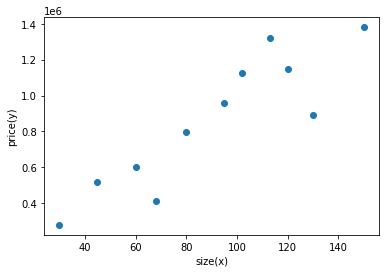

In [3]:
#3.数据可视化
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(x,y)
plt.xlabel('size(x)')
plt.ylabel('price(y)')
plt.show()

In [4]:
#4. 数据格式处理
print(type(x))
x = np.array(x)
print(type(x))
y = np.array(y)
print(x.shape,y.shape)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
(11,) (11,)


这里的-1被理解为unspecified value，意思是未指定为给定的。如果我只需要特定的行数，列数多少我无所谓，我只需要指定行数，那么列数直接用-1代替就行了，计算机帮我们算有多少列，反之亦然。

In [5]:
#我们不想要（n,)的格式，我们想要（n,1)的格式
x = x.reshape(-1,1)
y = y.reshape(-1,1)
#也就是说我们不关心列数，只想让行数为1

In [6]:
#5. 创建模型实例
from sklearn.linear_model import LinearRegression as L
model = L()
#6.训练模型
model.fit(x,y)

LinearRegression()

In [7]:
#获取线性回归的模型系数
a = model.coef_ #斜率
b = model.intercept_
print('f(x) = %f x + %f'%(a,b))

f(x) = 8905.691772 x + 53690.915479


In [8]:
#获取预测结果
y_predict = a*x+b
print(y_predict)

[[ 659277.95598426]
 [ 899731.63383191]
 [ 962071.47623686]
 [1211430.84585665]
 [ 588032.42180718]
 [ 454447.04522515]
 [ 320861.66864311]
 [ 766146.25724988]
 [1122373.9281353 ]
 [1060034.08573035]
 [1389544.68129936]]


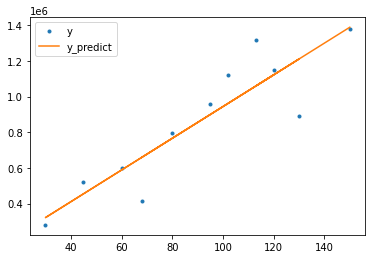

In [9]:
plt.plot(x,y,'.',label = 'y')
plt.plot(x,y_predict,label = 'y_predict')
plt.legend()
plt.show()

In [10]:
model.predict(np.array([[100]]))

array([[944260.09269259]])

In [13]:
#模型评估
from sklearn.metrics import mean_squared_error, r2_score
#寻找预测值和真实值的MSE
#MSE 越小越好
MSE = mean_squared_error(y,y_predict)
#R2 越接近一越好
R2 = r2_score(y,y_predict)

print('MSE = %f , R2 = %f'%(MSE,R2))

MSE = 24142828491.614578 , R2 = 0.805938
